# Assignment 3  
\# Aditya Daftari  
\# ad6173


* The main goal of assignment 3 is to develop a **deep learning classification** model to predict the direction of the S&P500 (daily basis) for the dates **2022-01-01—2022-11-30** (test set). The period of the train dataset is your own choice (normally it should be more than 15 years). You may consider dividing the dataset and shifting the training window after each prediction on a quarterly, monthly or weekly basis, but any type of processing will be accepted as long as it makes sense.
* Make sure that you switch your GPU on, you have access to it on Colab. The training stage may take long, you might want to use a smaller amount of data, or fewer epochs at first to speed up your development process.  
*   Note that we *won't* be attempting to measure the quality of every feature (i.e., how much it improves the model), so please don't be afraid if your model doesn't output good results.  
* **Hand in**: Please submit the .ipynb notebook and name it ‘HWX_FirstName_NetID’. The notebook should include all classes and functions you implemented with proper comments, and explanation of your operations and results. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#1. Import the Dataset (2pts) 
You may use [yfinance](https://pypi.org/project/yfinance/) API to prepare the data. A typical historical dataset contains the date, open price, close price, highest price, lowest price, and volume of the asset for each trading day. Download the historical dataset for S\&P500 and conduct necessary data pre-processing.


In [ ]:
# download the data

## Your code here!
df = yf.download(tickers=['^GSPC'], start='2004-12-01', end='2022-12-02')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-01,1173.780029,1191.369995,1173.780029,1191.369995,1191.369995,1772800000
2004-12-02,1191.369995,1194.800049,1186.719971,1190.329956,1190.329956,1774900000
2004-12-03,1190.329956,1197.459961,1187.709961,1191.170044,1191.170044,1566700000
2004-12-06,1191.170044,1192.410034,1185.180054,1190.250000,1190.250000,1354400000
2004-12-07,1190.250000,1192.170044,1177.069946,1177.069946,1177.069946,1533900000


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-25,4023.340088,4034.020020,4020.760010,4026.120117,4026.120117,1706460000
2022-11-28,4005.360107,4012.270020,3955.770020,3963.939941,3963.939941,3615430000
2022-11-29,3964.189941,3976.770020,3937.649902,3957.629883,3957.629883,3546040000
2022-11-30,3957.179932,4080.110107,3938.580078,4080.110107,4080.110107,6579360000
2022-12-01,4087.139893,4100.509766,4050.870117,4076.570068,4076.570068,4527130000


In [ ]:
df.isna().any().any()

False

<Axes: xlabel='Date'>

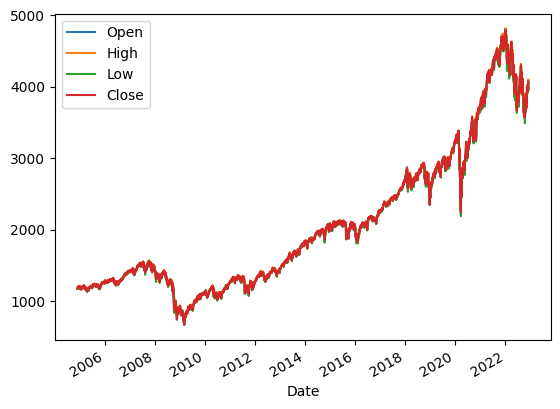

In [ ]:
# Plot
ohlcv_df = df.drop(columns=['Close'])  # dropping close price, will use adj close price as close price
ohlcv_df = ohlcv_df.rename(columns={'Adj Close': 'Close'})
ohlcv_df[['Open', 'High', 'Low', 'Close']].plot()

<Axes: xlabel='Date'>

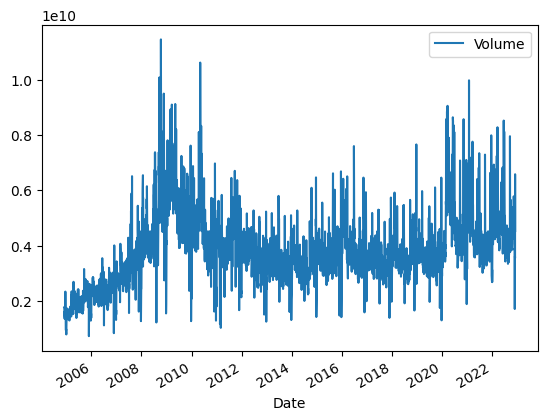

In [ ]:
ohlcv_df[['Volume']].plot()

#2. Feature Engineering (2pts) 
* For this part, you can choose and compute any feature you like (most features work in deep learning models as long as they are normalized).  

* Do not include data that is not published or can't be accessed on the predicting date, this will bring information leakage problems.  

* Split the data into train and test set.

In [ ]:
## Your code here!
test_start = '2022-01-01'
test_end = '2022-11-30'

In [ ]:
#momentum features
mom_ftr_df = pd.DataFrame()
for n in list(range(1,21)):
  ret_period = ohlcv_df['Close'].pct_change(periods=n)
  name = 'ret' + str(n)
  mom_ftr_df[name] = ret_period
mom_ftr_df = mom_ftr_df.dropna(axis=0, how='any')
mom_ftr_df.head()

,ret1,ret2,ret3,ret4,ret5,ret6,ret7,ret8,ret9,ret10,ret11,ret12,ret13,ret14,ret15,ret16,ret17,ret18,ret19,ret20
Date,,,,,,,,,,,,,,,,,,,,
2004-12-30,0.000082,0.000008,0.007162,0.002826,0.003291,0.006720,0.015821,0.016203,0.008594,0.006494,0.008451,0.012405,0.021507,0.020442,0.025989,0.030992,0.019576,0.018788,0.019507,0.018617
2004-12-31,-0.001343,-0.001261,-0.001335,0.005810,0.001479,0.001943,0.005367,0.014456,0.014838,0.007239,0.005142,0.007097,0.011045,0.020135,0.019071,0.024611,0.029607,0.018206,0.017420,0.018138
2005-01-03,-0.008119,-0.009452,-0.009370,-0.009444,-0.002357,-0.006652,-0.006192,-0.002796,0.006219,0.006599,-0.000939,-0.003019,-0.001080,0.002836,0.011852,0.010797,0.016292,0.021248,0.009939,0.009159
2005-01-04,-0.011671,-0.019696,-0.021013,-0.020932,-0.021005,-0.014001,-0.018246,-0.017791,-0.014434,-0.005525,-0.005150,-0.012600,-0.014655,-0.012739,-0.008868,0.000042,-0.001001,0.004430,0.009328,-0.001848
2005-01-05,-0.003628,-0.015257,-0.023252,-0.024564,-0.024484,-0.024556,-0.017578,-0.021808,-0.021355,-0.018010,-0.009132,-0.008759,-0.016182,-0.018230,-0.016321,-0.012464,-0.003586,-0.004625,0.000786,0.005667


In [ ]:
# Day of month/week feature
day_ftr_df = pd.DataFrame()
day_ftr_df['DoM'] = ohlcv_df.index.day
day_ftr_df['DoW'] = ohlcv_df.index.day_of_week
day_ftr_df.index = ohlcv_df.index

In [ ]:
# Combine all features, generate Y,
X_df = pd.concat([ohlcv_df, mom_ftr_df, day_ftr_df], axis=1)
X_df = X_df.dropna(axis=0, how='any')
X_df['y'] = X_df['ret1'] > 0
X_df['y'] = X_df['y'].shift(-1)
X_df = X_df.dropna(axis=0, how='any')
y = X_df['y']
X_df = X_df.drop(columns=['y'])

In [ ]:
#  Split data into train and test
X_df_train = X_df[X_df.index < test_start]
X_df_test = X_df[(X_df.index >= test_start) & (X_df.index <= test_end)]
y_train = np.array(y[y.index < test_start].astype(float))
y_test = np.array(y[(y.index >= test_start) & (y.index <= test_end)].astype(float))

In [ ]:
# Add dummy columns for day of month and day of week
# cat_cols = ['DoM', 'DoW']
cat_cols = ['DoW']
onehot = OneHotEncoder(handle_unknown='ignore').fit(X_df_train[cat_cols].values)
X_cat_train = onehot.transform(X_df_train[cat_cols].values).toarray()
X_cat_test = onehot.transform(X_df_test[cat_cols].values).toarray()
print(X_cat_train.shape, X_cat_test.shape)

(4282, 5) (230, 5)


In [ ]:
# Seperate out ohlc features from volume and momentum features and perform min-max scaling
ohlc_cols = ['Open', 'High', 'Low', 'Close']
ohlc_df_train = X_df_train[ohlc_cols]
ohlc_df_test = X_df_test[ohlc_cols]
max_ = ohlc_df_train.max().max()
min_ = ohlc_df_train.min().min()
X_ohlc_train = ((ohlc_df_train - min_)/(max_ - min_)).values
X_ohlc_test = ((ohlc_df_test - min_)/(max_ - min_)).values
print(X_ohlc_train.shape, X_ohlc_test.shape)

(4282, 4) (230, 4)


In [ ]:
# apply standard scalar to vol and mom features
vm_cols = list(set(X_df.columns) - set(ohlc_cols) - set(cat_cols))
vm_df_train = X_df_train[vm_cols]
vm_df_test = X_df_test[vm_cols]
scl = StandardScaler().fit(vm_df_train.values)
X_vm_train = scl.transform(vm_df_train.values)
X_vm_test = scl.transform(vm_df_test.values)
print(X_vm_train.shape, X_vm_test.shape)

(4282, 22) (230, 22)


In [ ]:
# Adding ohlc data for previous n_timesteps days for each day
def split_sequences(sequences, n_timesteps):
    X = list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_timesteps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input parts of the pattern
        seq_x = sequences[i:end_ix, :-1]
        X.append(seq_x)
    X = np.array(X)
    return X.reshape(X.shape[0], -1)

In [ ]:
# Adding ohlc data for previous n_timesteps days for each day
n_timesteps = 5
X_ohlc = np.concatenate([X_ohlc_train, X_ohlc_test], axis=0)
X_ohlc = split_sequences(X_ohlc, n_timesteps)
test_size = X_ohlc_test.shape[0]
X_ohlc_train = X_ohlc[:-test_size, :]
X_ohlc_test = X_ohlc[-test_size:, :]
print(X_ohlc_train.shape, X_ohlc_test.shape)

(4278, 15) (230, 15)


In [ ]:
# Trim starting days of X components based on n_timesteps
print(X_cat_train.shape, X_vm_train.shape, y_train.shape)
X_cat_train = X_cat_train[n_timesteps-1:, :]
X_vm_train = X_vm_train[n_timesteps-1:, :]
y_train = y_train[n_timesteps-1:]
print(X_cat_train.shape, X_vm_train.shape, y_train.shape)

(4282, 5) (4282, 22) (4282,)
(4278, 5) (4278, 22) (4278,)


In [ ]:
# generate final X
X_train = np.concatenate([X_cat_train, X_ohlc_train, X_vm_train], axis=1)
X_test = np.concatenate([X_cat_test, X_ohlc_test, X_vm_test], axis=1)
# X_train = np.concatenate([X_ohlc_train, X_vm_train], axis=1)
# X_test = np.concatenate([X_ohlc_test, X_vm_test], axis=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4278, 42) (4278,)
(230, 42) (230,)


In [ ]:
# Compute class 1 and 0 sizes
class_1 = y_train.sum()
class_0 = len(y_train)-class_1
class_1,class_0

(2354.0, 1924.0)

In [ ]:
class_0_percentage=class_0/len(y_train)
class_1_percentage=class_1/len(y_train)

class_0_weight=class_1_percentage
class_1_weight=class_0_percentage

class_weight={0:class_0_weight,1:class_1_weight}

#3. Deep Learning Binary Classification (6 pts)

* Either [Pytorch](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) or [Tensorflow](https://www.tensorflow.org/tutorials/quickstart/beginner) is allowed to use.
* You can choose any type of deep learning architecture, e.g., LSTM, GRU, CNN, it is up to you.  
* You can implement an option to save your model after training, but this is optional. Print the ROC(AUC) and the train loss as well as the test loss. And plot scores vs. training epochs with 4 curves. 
* Remember to **set the random seed** (random state) so that when we run your software, we get similar results (the results doesn't have to be exactly the same). 
* Prevent overfitting by setting early stop, perform hyperparameters tuning, conduct validation test, etc.    
* And lastly, remember this is the stock market, so it is **difficult** to have an accuracy above 50%, and you won't be deducted any point for bad prediction results, good luck!
* Write a paragraph analyzing the results.

In [ ]:
## Your code here!
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
np.random.seed(42)

In [ ]:
# Model initialization Parameters
dropout_ratio=0.23
momentum=0.99 #helps prevent getting stuck in a local minimum
neurons=2**13
ker_init = 'he_normal'
# act_1='tanh' 
act_1='sigmoid' 
act_2='sigmoid'

In [ ]:
# Model fit parameters
optimizer=Adam(learning_rate=1e-3) 
epochs = 100
batch_size = 512
validation_split = 0.2
callbacks = [
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=150,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=150,
        verbose=1,
        mode='auto',
        restore_best_weights=True
    )
]

In [ ]:
# DNN model
model = Sequential()

# Input layer followed by hidden layer 1
model.add(Dense(neurons, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', input_shape=X_train.shape[1:], activation=act_1))
model.add(Dropout(dropout_ratio))

# hidden layer 2
model.add(Dense(neurons/2, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
model.add(Dropout(dropout_ratio))

# hidden layer 3
model.add(Dense(neurons/4, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
model.add(Dropout(dropout_ratio))

# hidden layer 4
model.add(Dense(neurons/8, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
model.add(Dropout(dropout_ratio))

# hidden layer 5
model.add(Dense(neurons/16, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
model.add(Dropout(dropout_ratio))

# hidden layer 6
# model.add(Dense(neurons, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
# model.add(Dropout(dropout_ratio))

# # hidden layer 7
# model.add(Dense(neurons, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
# model.add(Dropout(dropout_ratio))

# # hidden layer 8
# model.add(Dense(neurons, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
# model.add(Dropout(dropout_ratio))

# # hidden layer 9
# model.add(Dense(neurons, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
# model.add(Dropout(dropout_ratio))

# # hidden layer 10
# model.add(Dense(neurons, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
# model.add(Dropout(dropout_ratio))

# # hidden layer 11
# model.add(Dense(neurons, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
# model.add(Dropout(dropout_ratio))

# # hidden layer 12
# model.add(Dense(neurons, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
# model.add(Dropout(dropout_ratio))

# # hidden layer 13
# model.add(Dense(neurons, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
# model.add(Dropout(dropout_ratio))

# # hidden layer 14
# model.add(Dense(neurons, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
# model.add(Dropout(dropout_ratio))

# # hidden layer 15
# model.add(Dense(neurons, use_bias=True, kernel_initializer=ker_init, bias_initializer='zeros', activation=act_1))
# model.add(Dropout(dropout_ratio))

# output layer
model.add(Dense(1, activation=act_2))

model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimizer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8192)              352256    
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              33558528  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 2048)              8390656   
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              2

In [ ]:
training = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, class_weight=class_weight, callbacks=callbacks)

Epoch 1/100
7/7 [==============================] - 8s 224ms/step - loss: 0.6839 - acc: 0.4921 - val_loss: 0.9245 - val_acc: 0.5643 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 1s 108ms/step - loss: 0.4177 - acc: 0.4854 - val_loss: 0.8397 - val_acc: 0.4357 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 1s 105ms/step - loss: 0.3684 - acc: 0.5038 - val_loss: 0.6949 - val_acc: 0.5643 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 65ms/step - loss: 0.3637 - acc: 0.4845 - val_loss: 0.7421 - val_acc: 0.4357 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 1s 101ms/step - loss: 0.3549 - acc: 0.4971 - val_loss: 0.6855 - val_acc: 0.5643 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 69ms/step - loss: 0.3531 - acc: 0.5082 - val_loss: 0.7088 - val_acc: 0.4357 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 63ms/step - loss: 0.3542 - acc: 0.4819 - val_loss: 0.6898 - val_acc: 0.5643 - lr: 0.

val_loss 0.6932129859924316


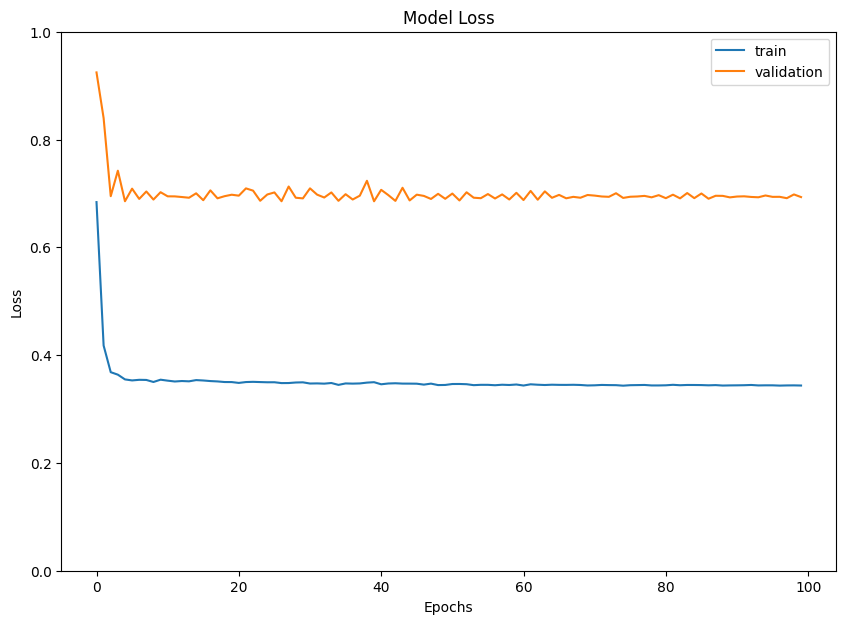

In [ ]:
# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
plt.ylim((0,1))
print('train_loss', training.history['loss'][-1])
print('val_loss', training.history['val_loss'][-1])

val_acc 0.4357476532459259


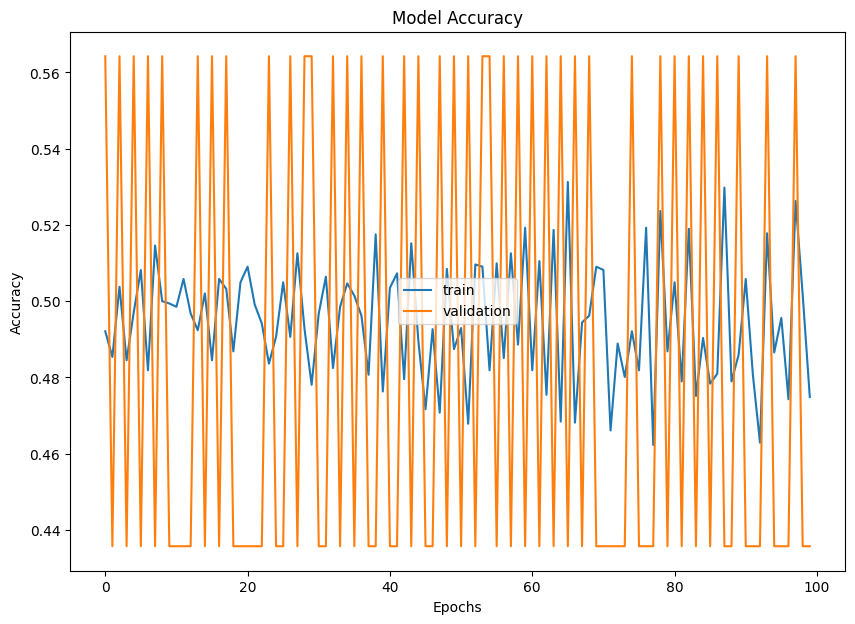

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(10,7))
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
print('train_acc', training.history['acc'][-1])
print('val_acc', training.history['val_acc'][-1])

In [ ]:
# prediction on test set
pred_test=np.ones(len(X_test))
for i in range(X_test.shape[0]):    
    pred_test[i]=np.where(model.predict(np.expand_dims(X_test[i],axis=0))[0][0]>0.5,1,0)
pred_test=np.reshape(pred_test,(1,-1)).tolist()[0]

1/1 [==============================] - 0s 28ms/step


In [ ]:
# Accuracy on test set
acc = accuracy_score(list(y_test),list(pred_test))
print("test_acc", acc*100,'%')
# ROC AUC score
test_rocauc = roc_auc_score(y_test, pred_test)
print(f"test ROC AUC: {test_rocauc:.4f}")

The Accuracy of the model on the test set is: 56.52173913043478 %
Test ROC AUC: 0.5000


---
**Result Analysis**

---



I tried various architectures for the model -
1. 2 hidden layers with 2^7 neurons each
2. 2 hidden layers with 2^10 neurons each
3. 5 hidden layers with 2^10 neurons each
4. 10 hidden layers with 2^10 neurons each
5. 15 hidden layers with 2^10 neurons each
6. 5 hidden layers with 2^13 neurons each
7. 5 hidden layers with 2^14 neurons each
8. 5 hidden layers with tapering architecture 2^14, 2^13, .. and so on neurons

All of them seem to produce similar results in this case with a validation loss (binary crossentropy) reach a minimum value around 0.7 after very few epochs of the order of tens. The validation accuracy switched continuously between around 44% to 56%, with test accuracy of 56%. I tried to improve the performance by adding more features after intially starting with just the ohlcv data. But that did not result in a better performance either.

